<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.401 · Fonaments de Programació</p>
    <p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Fonaments de Programació
============================

--- 

Unitat 7: Anàlisi de dades en Python
-----------------------------------------------------

---

# Instruccions d'ús

Aquest document és un *notebook* interactiu que intercala explicacions més aviat teòriques de conceptes de programació amb fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hàgiu llegit el contingut, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants que us permetin comprovar que heu entès la seva funcionalitat i explorar-ne els detalls d'implementació. Per últim, us recomanem també consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats. 

# Instruccions d'ús

Aquest document és un *notebook* interactiu que intercala explicacions més aviat teòriques de conceptes de programació amb fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hàgiu llegit el contingut, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants que us permetin comprovar que heu entès la seva funcionalitat i explorar-ne els detalls d'implementació. Per últim, us recomanem també consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/prog_datasci_7

# Introducció

Aquesta unitat mostra com implementar algunes de les tècniques més populars d'anàlisi de dades en Python. En primer lloc, es presenta una anàlisi exploratòria bàsica d'un conjunt de dades. A continuació, veurem com reduir la dimensionalitat del conjunt de dades, fent servir PCA. Després, implementarem un classificador i un mètode de clústering de dades, i en visualitzarem els resultats. Finalment, veurem com validar el model aprés fent servir la llibreria sklearn.

A continuació s'inclou la taula de continguts, que podeu fer servir per navegar pel document:

<ul style="list-style-type:none">
    <li><a href='#1-Introduccio'>1 Introducció</a></li>
    <li><a href="#2-Una-petita-introduccio-a-aprenentatge-automatic">2 Una petita introducció a l'aprenentatge automàtic</a></li>
    <ul style="list-style-type:none">
        <li><a href="#2.1-Validacio-creuada">2.1 Validació creuada</a></li>
        <li><a href="#2.2-El-conjunt-de-dades-de-flors-d'Iris">2.2 El conjunt de dades de flors d'Iris</a></li>
    </ul>
    <li><a href='#3-Analisi-exploratoria-de-dades'>3 Anàlisi exploratòria de dades</a></li>
    <li><a href="#4-Reducció-de-la-dimensionalitat-del-dataset">4 Reducció de la dimensionalitat del dataset</a></li>
    <li><a href="#5-Classificacio">5 Classificació</a></li>
    <li><a href="#6-Clustering">6 Clustering</a></li>
    <li><a href="#7-Validacio-del-model">7 Validació del model</a></li>    
    <li><a href="#8-Exercicis-i-preguntes-teoriques">8 Exercicis i preguntes teòriques</a></li>
    <ul style="list-style-type:none">
        <li><a href="#8.1-Instruccions-importants">8.1 Instruccions Importants</a></li>
     </ul>  
    <li><a href="#9-Bibliografia">9 Bibliografia</a></li>
</ul>

<a id='1-Introduccio'></a>
# 1 Introducció

L'anàlisi de dades i l'extracció d'informació i patrons a partir d'aquestes dades, la qual cosa es coneix com a mineria de dades, s'està convertint en peça clau en molts segments de l'economia: des d'oferir determinats descomptes a clients d'un supermercat sobre la base de les seves preferències de consum (adquirides per mitjà d'un programa de fidelització per punts, per exemple), fins a la classificació automàtica d'imatges a qualsevol xarxa social.

En aquest mòdul treballarem amb llibreries que ja hem presentat als
mòduls anteriors ([NumPy](http://www.numpy.org/),
[pandas](http://pandas.pydata.org/) i
[scikit-learn](http://scikit-learn.org)). Aquest Notebook conté exemples concrets de tècniques que poden
aplicar-se per analitzar les dades. Com al mòdul anterior, és important
destacar que s'han seleccionat únicament algunes tècniques, però, a la
pràctica, el conjunt de tècniques que s'apliquen per a l'anàlisi de
dades és molt més extens. A més, per a la majoria d'exemples farem servir les
configuracions per defecte incorporades a les llibreries, però algunes
de les funcions que provarem tenen multitud de paràmetres que podem ajustar.

<a id='2-Una-petita-introduccio-a-aprenentatge-automatic'></a>
# 2 Una petita introducció a l'aprenentatge automàtic

L'aprenentatge automàtic (més conegut per la seva denominació en anglès, _machine learning_ o ML) és la branca de la intel·ligència artificial que engloba el conjunt de tècniques que permeten que els ordinadors aprenguin, és a dir, que siguin capaços de desenvolupar comportaments pels quals no han estat explícitament programats. En els últims anys, l'aprenentatge automàtic ha estat aplicat amb èxit a multitud de problemes, fent que avui dia fem servir aquest tipus de sistemes diàriament, de vegades sense ni tan sols ser-ne conscients. 

En el problema de l'aprenentatge es té en consideració una mostra d'_n_ observacions i, a partir d'elles, s'intenten predir propietats de dades desconegudes. Quan treballem amb dades multidimensionals, parlem de cadascun dels seus atributs com a característiques (en anglès _features_). Tornant a l'exemple del programa de descomptes a clients d'un supermercat, podríem entendre la mostra com el nombre de clients que tenen una targeta de punts (i l'han feta servir en alguna ocasió). Per a cadascun, tenim certes dades que hem pogut guardar: nombre de begudes gasoses comprades, nombre d'aliments d'origen vegetal, animal, etc. Aquestes dades que caracteritzen un determinat client és el que entendríem com a atributs. A partir d'aquests atributs, potser estaríem interessats a analitzar el consum d'aliments d'origen vegetal i no animal dels clients i llavors oferir-los determinats descomptes en productes d'origen «bio», per exemple, i augmentar la factura mensual d'aquests productes en la cadena de supermercats.

Principalment, distingim dues categories d'algorismes d'aprenentatge automàtic: **supervisat** i **sense supervisió**.

En l'aprenentatge automàtic supervisat, les dades contenen certs atributs que volem predir. Bé podem classificar-les en diferents categories (**classificació**) o potser ens interessi predir una variable contínua sobre la base dels atributs coneguts (**regressió**).

Un exemple de classificació podria ser, mitjançant un text escanejat, assignar a cada caràcter trobat una lletra ([reconeixement d'escriptura](https://es.wikipedia.org/wiki/Reconocimiento_%C3%B3ptico_de_caracteres), un problema clàssic). Quant a un exemple de regressió, podríem voler predir l'edat d'un gos sobre la base del seu pes, altura i color i longitud del pèl.

En l'aprenentatge automàtic sense supervisió l'objectiu és descobrir noves propietats de les dades d'entrada, ja sigui agrupant-les per propietats similars (_**clustering**_), descobrint la distribució que segueixen (**estimació de la densitat**) o bé projectant-les en menys o més dimensions ([PCA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales), visualització, etc.)

Sobre _clustering_, existeixen molts casos pràctics com per exemple l'agrupació de proteïnes sobre la base del seu pes atòmic o bé la segmentació de clients en un supermercat.

<a id='2.1-Validacio-creuada'></a>

# 2.1. Validació creuada

De vegades el resultat de l'aprenentatge automàtic és un model que representa el conjunt de dades i que ens servirà per predir-ne alguna característica. Una de les tècniques que permeten avaluar la capacitat de generalització del model après és la **validació creuada**. Una ronda de validació creuada consisteix en la separació del conjunt de mostres disponibles en dos subconjunts disjunts, el conjunt d'**aprenentatge** i el conjunt de **validació** o test. El conjunt de mostres d'aprenentatge s'utilitza per entrenar el model, mentre que el conjunt de validació s'utilitza per avaluar el model. Algunes tècniques de validació creuada fan diverses rondes (amb diferents particions de les dades).

Separar les mostres d'aquesta manera permet evitar problemes com l'_overfitting_, comparar la capacitat de predicció de diferents tècniques, fer una selecció de característiques, entre d'altres aplicacions. 

<a id='2.2-El-conjunt-de-dades-de-flors-Iris'></a>
# 2.2 El conjunt de dades de flors d'Iris

En aquesta unitat treballarem amb un conjunt de dades clàssic: el conjunt de dades de **flors Iris**. A l'article de [Ronald Fisher](https://es.wikipedia.org/wiki/Ronald_Fisher) de 1936 titulat _The use of multiple measurements in taxonomic problems_, es van recopilar per tres classes de flors Iris relacionades (_Iris setosa_, _Iris virginica_ i _Iris versicolor_) quatre atributs: longitud i amplària de sèpals i pètals en cm ([anatomia d'una flor](https://es.wikipedia.org/wiki/P%C3%A9talo)). Per a cada tipus d'Iris, es van seleccionar cinquanta flors, per la qual cosa tenim una grandària d'observacions de 50 x 3 x 4 (nombre de flors x classes de flors x atributs mesurats). A continuació teniu un resum de les diferents característiques agrupades per tipus de flor (vermell per _setosa_, verd per _versicolor_, blau per _virginica_):

![](img/iris_data_set.png)
Font: Anderson's Iris data set d'Indon - Treball propi. Disponible sota la llicència CC BY-SA 3.0 via Wikimedia Commons


Per començar, carreguem el conjunt de dades de flors d'iris:

In [1]:
from sklearn import datasets

# Carreguem el dataset d'iris:
iris = datasets.load_iris()

<a id='3-Analisi-exploratoria-de-dades'></a>
# 3 Anàlisi exploratòria de dades

En primer lloc, observarem les característiques principals de les dades
que utilitzarem en aquest Notebook. Conèixer les dades amb les quals
treballarem ens ajudarà després en la creació de models i la validació
d'hipòtesis.

Podem donar un cop d'ull a la descripció del _dataset_:

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Al conjunt iris que acabem de carregar, les dades estan organitzades de
la manera següent: cada fila és una mostra, i per a cada mostra, les
columnes (les característiques) són: longitud del sèpal, amplada del
sèpal, longitud del pètal i amplada del pètal.

Representar visualment les dades també ens permet aproximar-nos-hi per primera 
vegada. Generarem un *scatter plot* amb els dos
primers atributs.

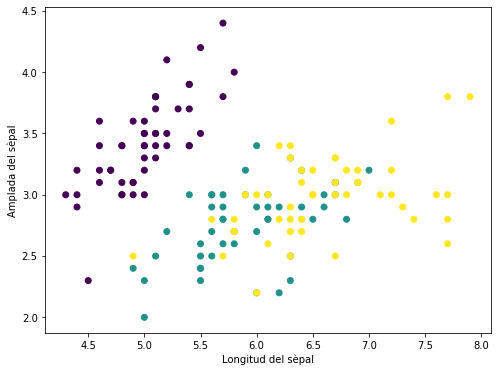

In [23]:
%matplotlib inline

# Importem les llibreries.
import matplotlib.pyplot as plt
from sklearn import datasets

# Importem el dataset.
iris = datasets.load_iris()

# Seleccionem solament els dos primers atributs.
X = iris.data[:, :2]
Y = iris.target

# Creem la figura.
plt.figure(1, figsize=(8, 6))
plt.clf()

# Acolorim utilitzant la categoria.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel(u'Longitud del sèpal')
_ = plt.ylabel(u'Amplada del sèpal')

Després, creem un *box plot* que resumeix les dades de tots els
atributs disponibles.

In [2]:
# Carreguem les dades en un dataframe de pandas.
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)

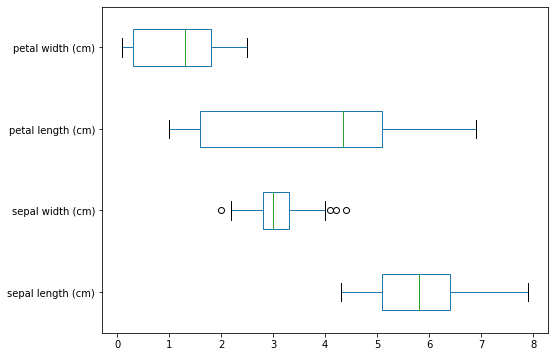

In [25]:
# Mostrem un box plot amb els quatre atributs.
df.plot.box(vert=False, figsize=(8, 6))

Finalment, mostrem histogrames per als valors de cada atribut.

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

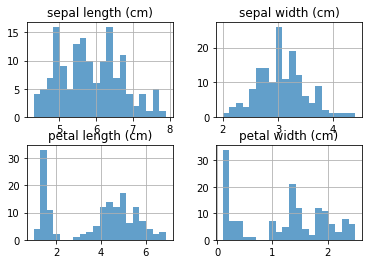

In [3]:
# Generem els histogrames.
df.hist(alpha=0.7, bins=20)

<a id='4-Reduccio-de-la-dimensionsalitat-del-dataset'></a>
# 4 Reducció de la dimensionalitat del dataset

Per tal de manejar **la dimensionalitat** i evitar problemes com el sobre-ajust, s'utilitzen mètodes com l'Anàlisi de la Component Principal (**Principal Component Analysis** o **PCA**). El PCA és un mètode que s'utilitza per reduir el nombre de variables de les dades mitjançant la transformació i extracció d'una mostra de dades rellevant. D'aquesta manera es redueix la dimensió de les dades amb l’objectiu de retenir la màxima informació possible. En altres paraules, aquest mètode combina variables altament correlacionades per formar un nombre més reduït d'un conjunt artificial de variables que s'anomenen "components principals" que expliquen la major part de la variabilitat de les dades.

Per posar un exemple, considerarem que volem reduir la dimensionalitat del seguent dataset de dues dimensions:

In [1]:
# Importem les llibreries:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

(-2.7359244314336473,
 2.576927665141713,
 -0.9415467289464468,
 1.0133424016577546)

A primer cop d'ull, sembla que hi ha una forta relació lineal entre les variables x (eix horitzontal) i y (eix vertical). El PCA té l'objectiu de trobar la relació entre x i y de forma no supervisada. Això ho aconsegueix buscant una llista dels eixos principals de les dades i utilitzant aquests eixos per descriure el conjunt de dades. Amb l'estimador de PCA de skearn, podem calcular-ho de la manera següent:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

# Amb la funció fit() podem calcular els "components principals" i "variació explicada" per cada un:
print('Els components del PCA són :\n ' + str(pca.components_)+ '\n')

print('La variabilitat explicada pels components és:\n ' + str(pca.explained_variance_))


Els components del PCA són :
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

La variabilitat explicada pels components és:
 [0.7625315 0.0184779]


Però què signifiquen aquests nombres? A continuació visualitzem-los com a vectors sobre les dades d'entrada, utilitzant els **components** per definir la direcció del vector i la **variància explicada** per definir la longitud quadrada del vector:

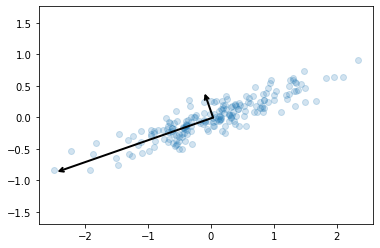

In [31]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# mostra les dades
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Aquests vectors representen els eixos principals de les dades, aquells que **expliquen la major part de la variabilitat de les dades**. En aquest cas particular l'eix més rellevant per resumir les dades és el més horitzontal (apuntant a les 8 d'un rellotge), a continuació el complementa l'eix més vertical (apuntant a les 11 d'un rellotge). Com que són complementaris, la seva direcció és sempre ortogonal. És per aquesta raó que tindrem un máxim de tants components com dimensions tingui el dataset amb els que treballem. La longitud del vector indica la importància que té aquest eix en la descripció de la distribució de les dades; més precisament, és una mesura de la variància de les dades en l'eix. 
En aquest cas, hem partit d'una dataset de 2 dimensions, la x i la y. Si vulguesim reduir la seva dimensionalitat a una sola variable sabríem que hem de transformar les dades projectant-les a l'eix més rellevant, el que correspon amb el component principal, en aquest cas sabem que seria l'eix més horitzontal.

<a id='5-Classificacio'></a>
# 5 Classificació

Hi ha múltiples algorismes de classificació. Vegem un exemple de
com fer servir un classificador *k nearest neighbors* per predir el tipus
d'espècies d'iris.

In [18]:
# Importem el classificador KNeighborsClassifier de la llibreria Sklearn.
from sklearn.neighbors import KNeighborsClassifier
# Importem NumPy
import numpy as np

# Seleccionem les dues primeres característiques (farem servir únicament dues característiques per
# poder representar gràficament els resultats en 2D).
X = iris.data[:, :2]
y = iris.target

# Separem les dades (de manera aleatòria) en dos subconjunts: el d'aprenentatge i el de test.
indices = np.random.permutation(len(iris.data))
iris_X_train = X[indices[:-10]]
iris_y_train = y[indices[:-10]]
iris_X_test  = X[indices[-10:]]
iris_y_test  = y[indices[-10:]]

# Creguem el classificador.
knn = KNeighborsClassifier()

# Entrenem el classificador.
knn.fit(iris_X_train, iris_y_train) 

# Provem el classificador.
iris_y_test_predicted = knn.predict(iris_X_test)

# Mostrem els resultats de la predicció sobre el conjunt de test.
print("Clases reales: \t\t" + str(iris_y_test))
print("Clases predichas: \t" + str(iris_y_test_predicted))
print("Accuracy: \t\t" + str(knn.score(iris_X_test, iris_y_test)))

NameError: name 'iris' is not defined

Podem visualitzar gràficament el classificador que hem après:

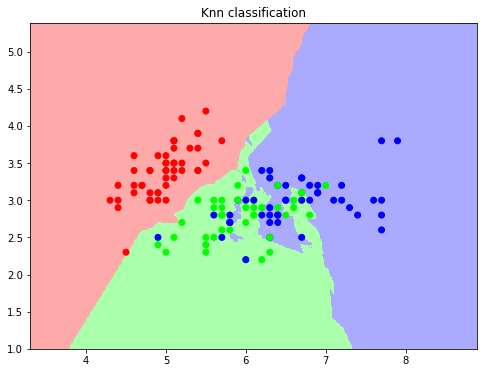

In [8]:
%matplotlib inline

# Importem la llibreria.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Creem els mapes de colors que farem servir per a la representació.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Calculem els limits de la visualització.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Fem la predicció.
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Mostrem el resultat en una figura.
plt.figure(1, figsize=(8, 6))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Mostrem les mostres fetes servir en l'aprenentatge.
plt.scatter(iris_X_train[:, 0], iris_X_train[:, 1], c=iris_y_train, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Knn classification")

plt.show()

<a id='6-Clustering'></a>
# 6 _Clustering_
----------

Com amb els algorismes de classificació, actualment hi ha multitud
d'algorismes de _clustering_. Vegem un exemple d'utilització de
l'algorisme *k-means*.

En primer lloc, generem una visualització del conjunt de mostres. A
continuació teniu un codi d'exemple en el qual representem la taxonomia de
les diferents mostres (acolorim per classe d'iris) en funció de la
longitud del sèpal (columna 0), l'amplada del sèpal (columna 1) i la
longitud del pètal (columna 2):

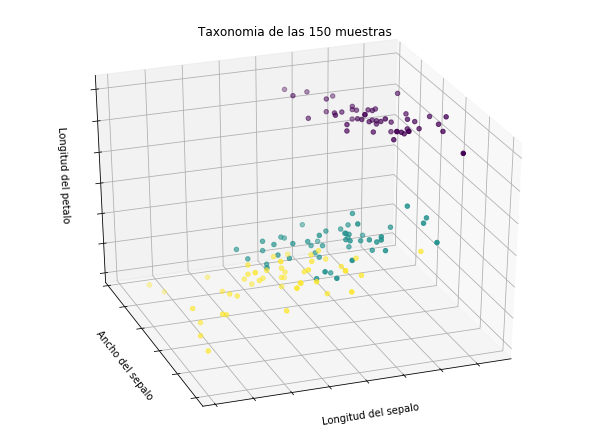

In [9]:
%matplotlib inline

# Carreguem les llibreries necessàries.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Carreguem el dataset.
iris = datasets.load_iris()
# Dades de la mostra
X_iris = iris.data
# Categories de la mostra (tres tipus d'Iris)
Y_iris = iris.target

# Creem una figura.
fig = plt.figure(1, figsize=(8, 6))
# De tipus 3D
ax = Axes3D(fig, elev=-150, azim=110)
# I representem els diferents punts, acolorint per tipus d'iris.
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=Y_iris)

# Llegendes i títols
ax.set_title("Taxonomia de las 150 muestras")
ax.set_xlabel("Longitud del sepalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Ancho del sepalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Longitud del petalo")
_ = ax.w_zaxis.set_ticklabels([])

Ara farem l'experiment següent: utilitzant l'algorisme de _clustering_
*k-means*, acolorirem utilitzant els grups que calculi l'algorisme i no
les classes que ja coneixem.

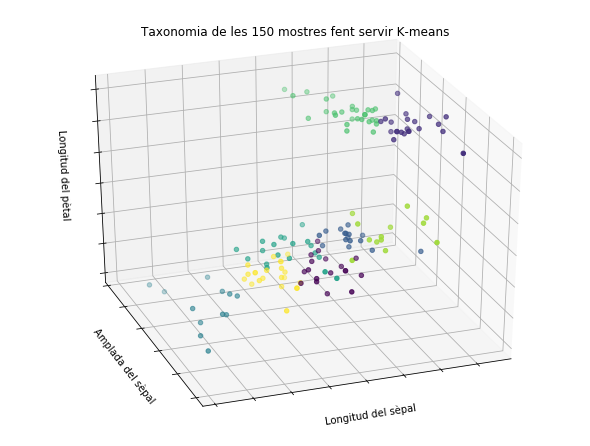

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Carreguem l'algorisme K-means i fem fit a les nostres dades:
k_means = cluster.KMeans()
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title("Taxonomia de les 150 mostres fent servir K-means")
ax.set_xlabel(u"Longitud del sèpal")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Amplada del sèpal")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pètal")
_ = ax.w_zaxis.set_ticklabels([])

Fixeu-vos que en **cap moment s'utilitza la classe de la mostra**
(`iris.target`) per entrenar l'algorisme ni per avaluar-l'ho! Ara estem
utilitzant un algorisme de _clustering_, que agruparà les mostres en
funció de les seves característiques. El resultat de l'algorisme és el
grup al qual pertany cada mostra (però l'algorisme no intenta predir la
classe de la mostra). Els noms dels grups generats són arbitraris (en
aquest cas, valors enters del 0 al número de grups - 1).

Forçarem que el nombre de clústers sigui igual a 3 i en representarem el
resultat:

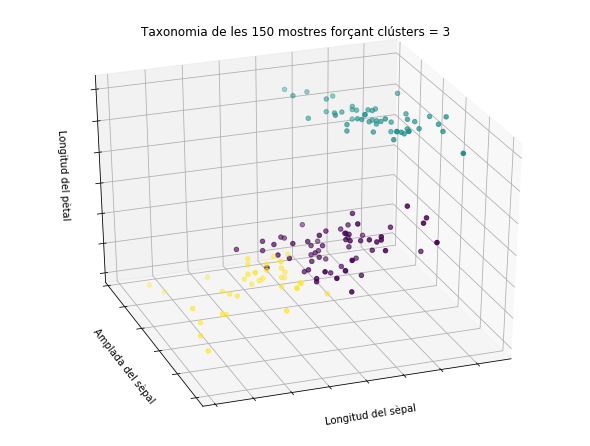

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Carreguem l'algorisme K-means i fem fit a les nostres dades,
# aquesta vegada forçant el nombre de clústers a tres:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title(u"Taxonomia de les 150 mostres forçant clústers = 3")
ax.set_xlabel(u"Longitud del sèpal")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Amplada del sèpal")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pètal")
_ = ax.w_zaxis.set_ticklabels([])

Recordeu que utilitzant un algorisme de _clustering_ no aprenem a quina
classe pertany cada mostra, sinó que simplement agrupem les mostres en
grups (clústers).

<a id='7-Validacio-del-model'></a>

# 7 Validació del model

Hem d'evitar avaluar els models amb les mateixes dades que s'han
utilitzat per a l'aprenentatge. A l'exemple de classificació, hem
separat les dades de manera aleatòria en dos conjunts, un per a
l'aprenentatge i un per al test. Aquesta tècnica es coneix com a
*holdout*. A l'exemple de la classificació hem fet servir NumPy per crear els
dos conjunts. A la unitat 6 vam veure com fer aquest mateix procés
usant les funcions sobre _dataframes_ que ofereix la lliberia Pandas. Ara
veurem com podem fer-ho amb Sklearn:

In [12]:
# Importem la funció 'train_test_split'.
from sklearn.model_selection import train_test_split

# Separem les mostres utilitzant un 20% per a test i la resta per a aprenentatge.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

print("Total de mostres: " + str(len(iris.data)))
print("Aprenentatge: " + str(len(X_train)), "(" + str(float(len(X_train))/len(iris.data)*100) + "%)")
print("Test: " + str(len(X_test)), "(" + str(float(len(X_test))/len(iris.data)*100) + "%)")

Total de mostres: 150
Aprenentatge: 120 (80.0%)
Test: 30 (20.0%)


També podem fer servir altres tècniques per avaluar els models, per exemple,
*kfold* o *leave one out*:

In [13]:
# Importem la funció KFold.
from sklearn.model_selection import KFold
# Importem NumPy.
import numpy as np

# Dividim un conjunt de nou mostres fent servir 3-Fold i en mostrem el resultat.
X = np.array(range(9))
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (X[train], X[test]))

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [14]:
# Importem la funció 'LeaveOneOut'.
from sklearn.model_selection import LeaveOneOut
# Importem NumPy
import numpy as np

# Dividim un conjunt de nou mostres fent servir 'LeaveOneOut' i mostrem el resultat.
X = np.array(range(9))
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (X[train], X[test]))

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]


<a id='8-Exercicis-i-preguntes-teoriques'></a>
# 8 Exercicis i preguntes teòriques

La part avaluable d'aquesta unitat consisteix en el lliurament d'un fitxer IPython Notebook amb extensió IPYNB que contindrà els diferents exercicis i les preguntes teòriques que s'han de contestar. Trobareu el fitxer (`prog_datasci_7_python_entrega.ipynb`) amb les activitats a la mateixa carpeta que aquest notebook que esteu llegint.

<a id='8.1-Instruccions-importants'></a>
## 8.1 Instruccions importants

És molt important que a l'hora de lliurar el fitxer Notebook amb les vostres activitats us assegureu que:

1. Les vostres solucions siguin originals. Esperem no detectar-hi còpia directa entre estudiants.
2. Tot el codi estigui correctament documentat. El codi sense documentar equivaldrà a un 0.
3. El fitxer comprimit que lliureu és correcte (conté les activitats de la PAC que heu de lliurar).

Per fer el lliurament, heu d'anar a la carpeta del drive Colab Notebooks, clicant botó dret a la PAC en qüestió i fent Download. D'aquesta manera us baixereu la carpeta de la PAC comprimida en zip. Aquest és l'arxiu que heu de pujar al campus de virtual de l'assignatura.

<a id='9-Bibliografia'></a>
# 9 Bibliografia

1. Aprenentatge supervisat amb sklearn: http://scikit-learn.org/stable/supervised_learning.html
2. Comparació de classificadors amb sklearn: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
3. Aprenentatge no supervisat amb sklearn: http://scikit-learn.org/stable/unsupervised_learning.html

# Autors

- Autor original **Cristina Pérez Solà**, 2017.
- Actualitzat per **Cristina Pérez Solà**, 2019.

<div style="width: 30%; clear: both;">
    <div style="width:0%;">&nbsp;</div>
           <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-sa.png">
    </div>
</div>